In [1]:
import torch
from torchvision import transforms
import h5py
from tqdm import tqdm
import torchvision
import numpy as np
from typing import Dict, Tuple, Optional
import os
import pathlib
import copy
from tqdm import tqdm
import sys
from itertools import product
import imutils
import cv2
import os
import matplotlib.pyplot as plt
import pickle as pkl
import datetime 

os.chdir('/local/crv/acanberk/folding-unfolding/src')
from learning.nets import *


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


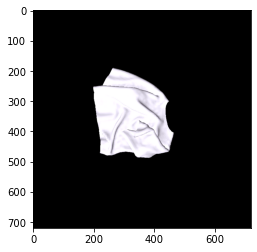

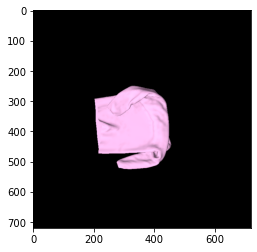

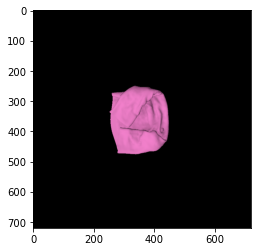

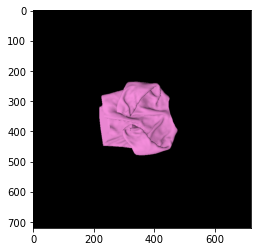

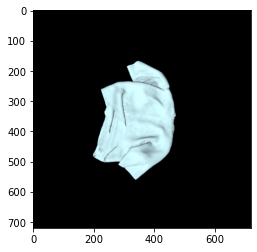

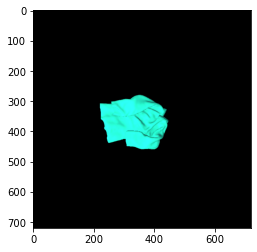

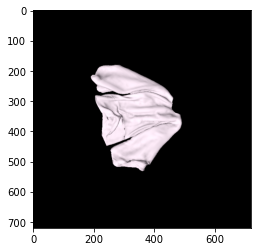

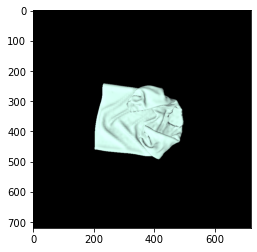

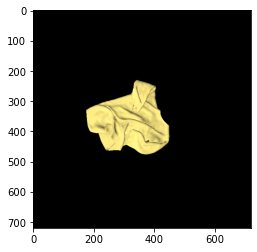

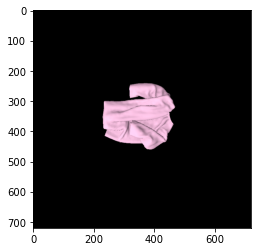

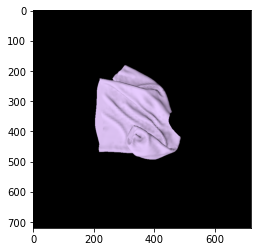

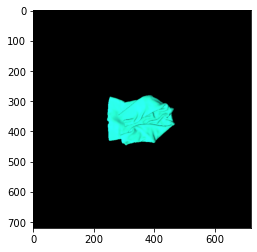

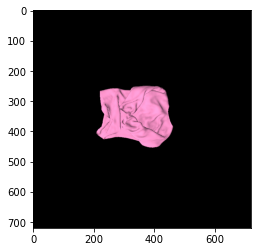

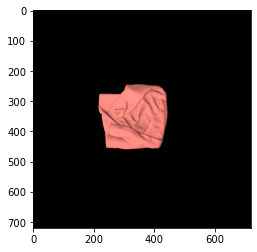

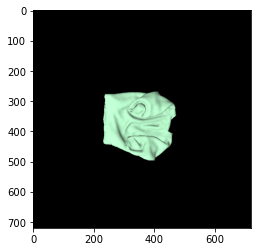

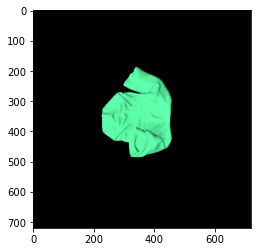

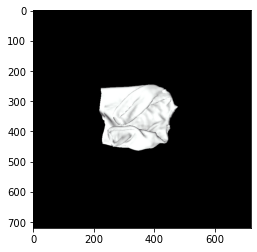

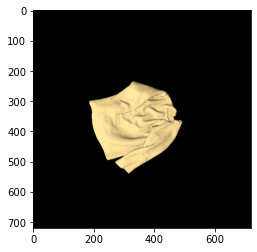

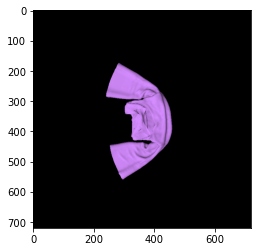

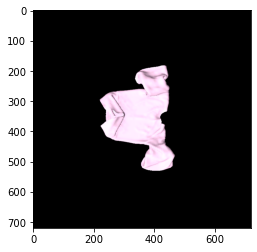

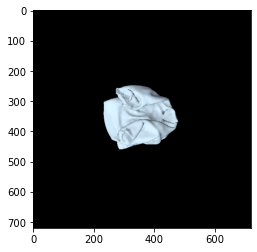

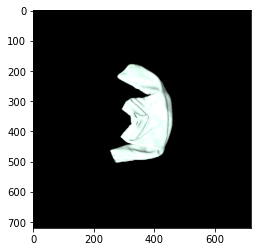

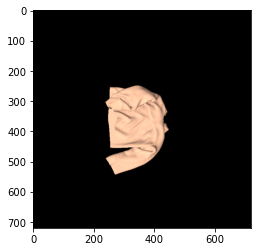

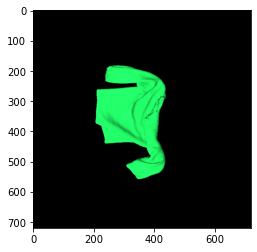

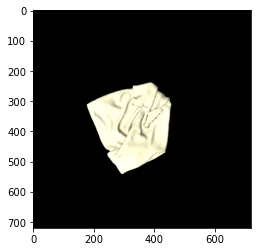

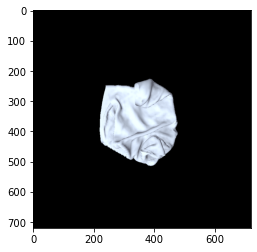

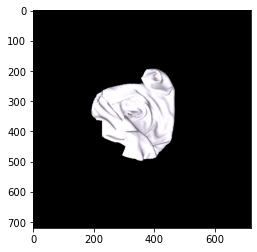

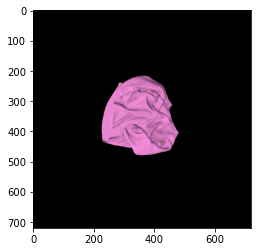

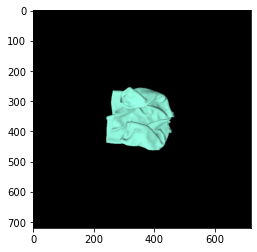

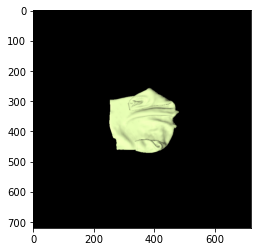

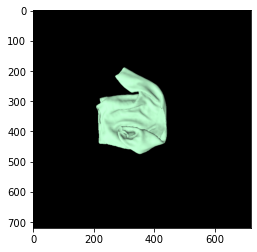

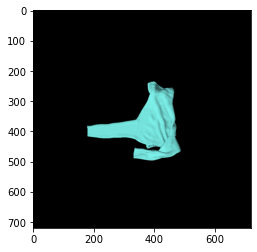

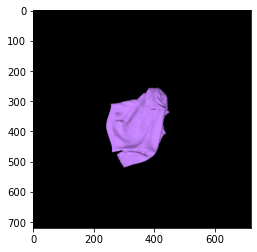

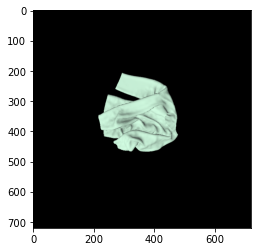

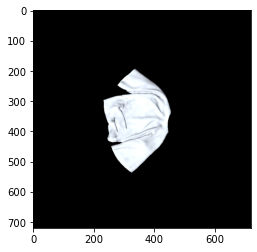

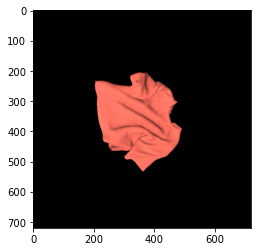

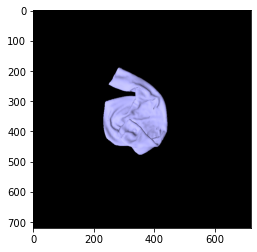

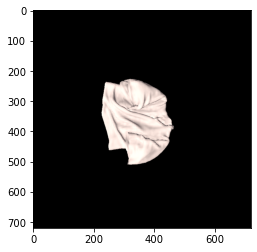

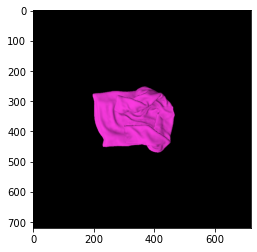

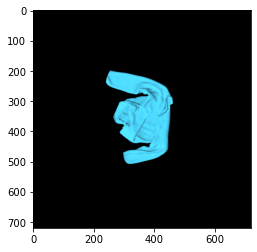

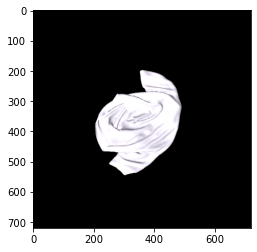

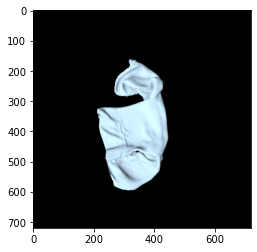

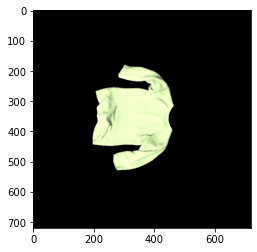

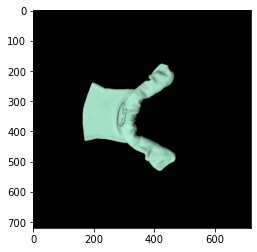

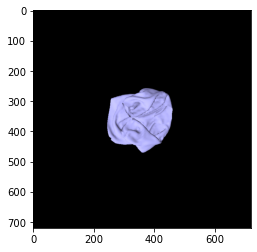

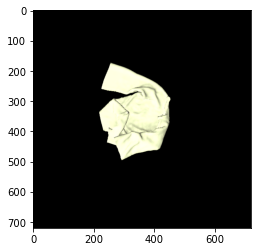

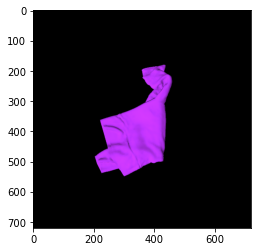

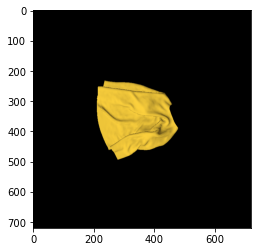

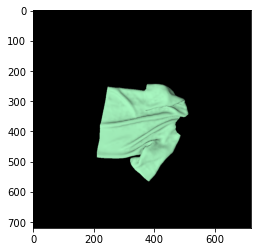

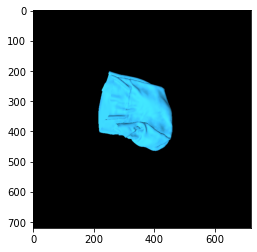

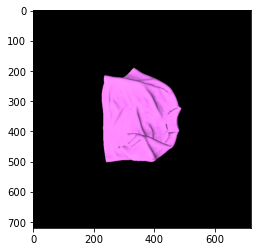

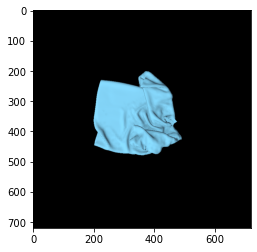

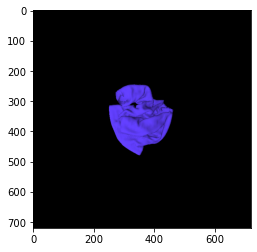

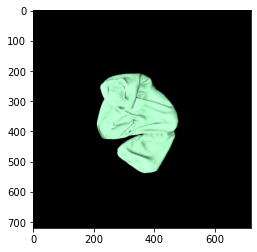

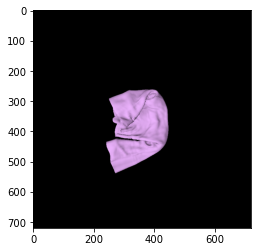

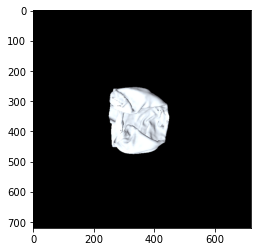

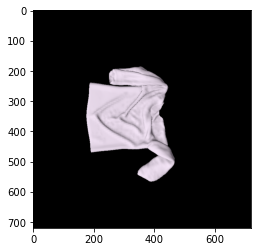

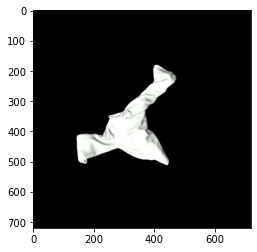

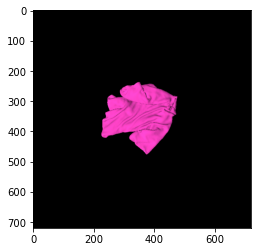

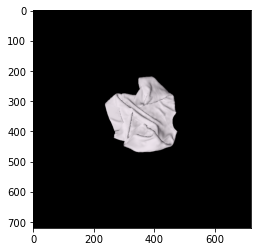

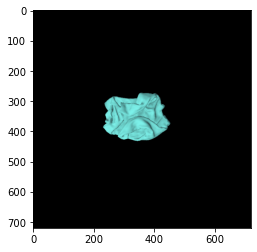

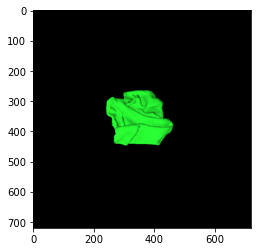

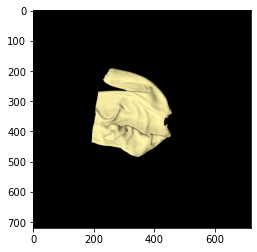

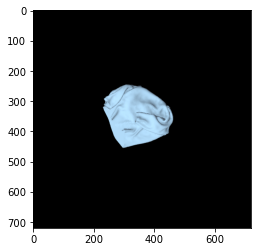

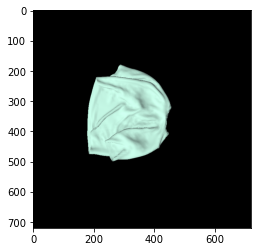

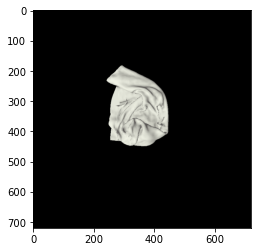

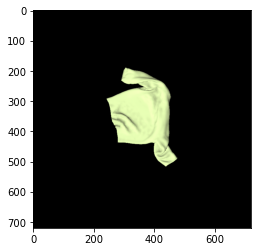

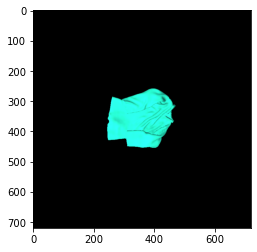

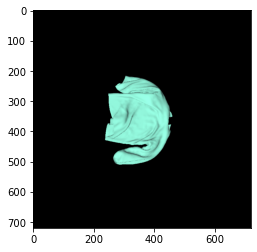

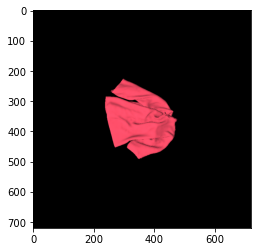

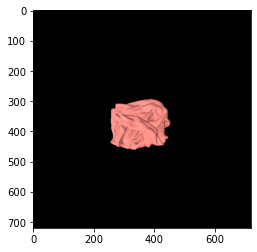

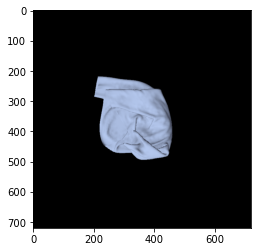

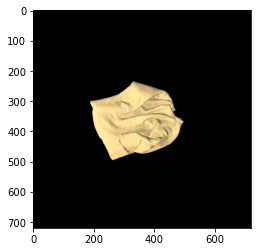

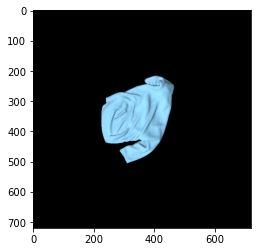

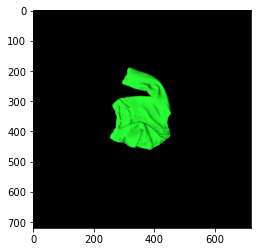

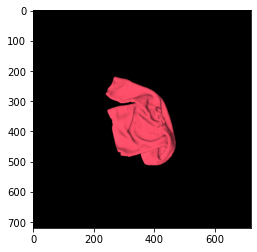

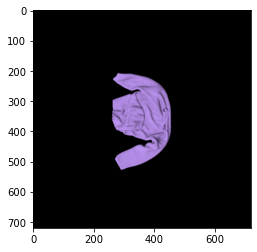

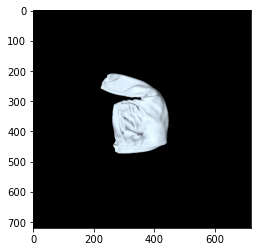

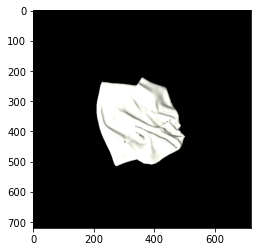

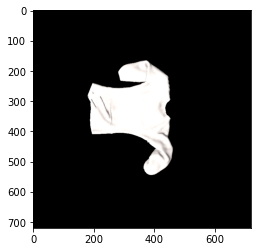

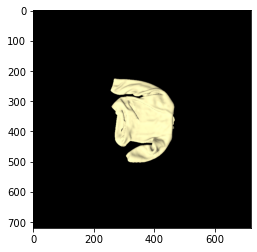

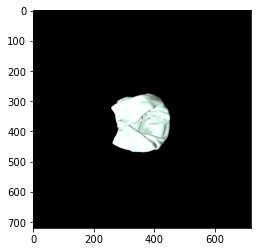

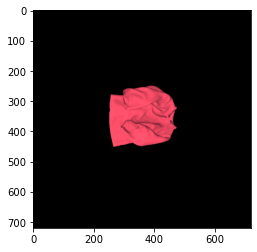

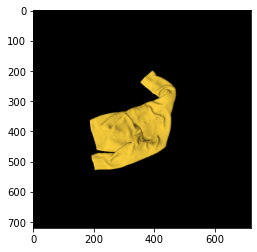

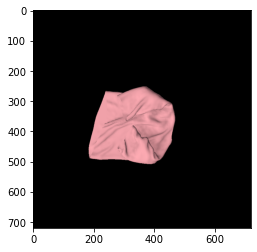

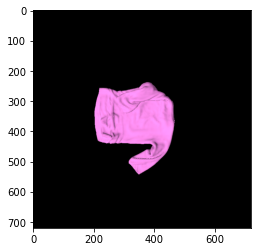

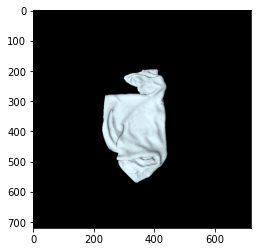

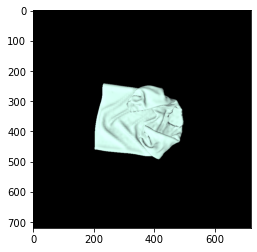

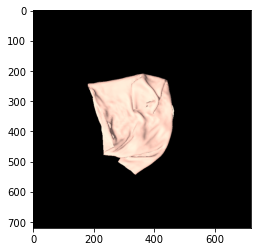

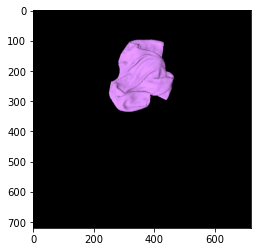

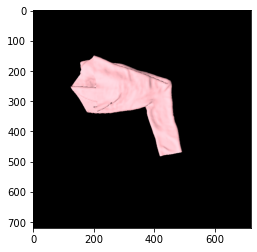

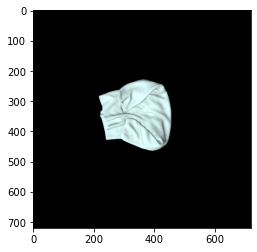

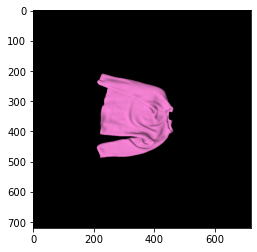

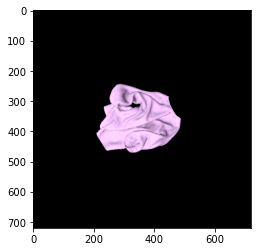

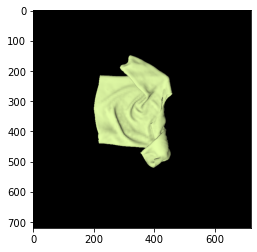

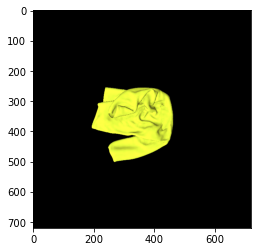

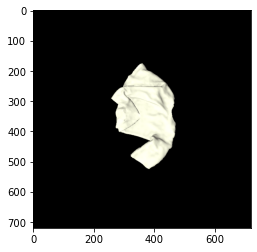

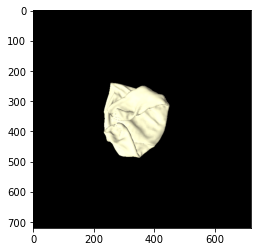

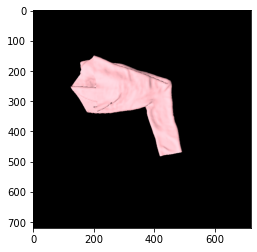

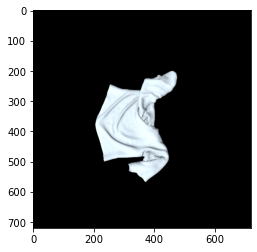

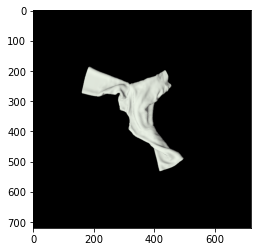

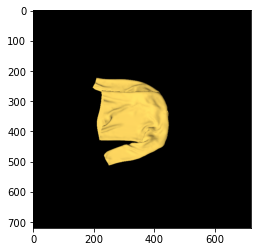

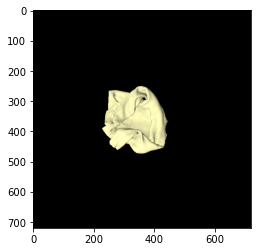

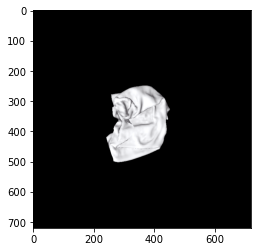

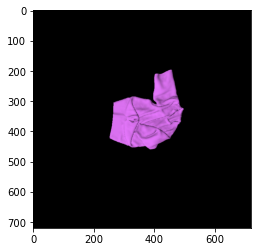

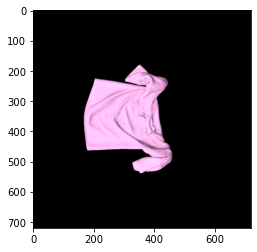

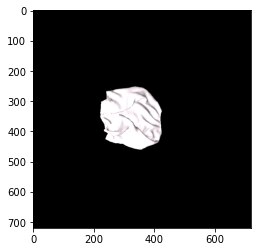

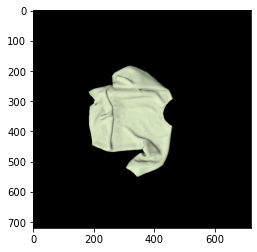

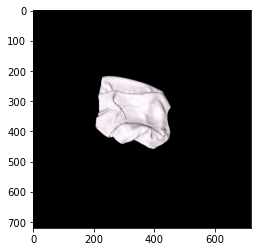

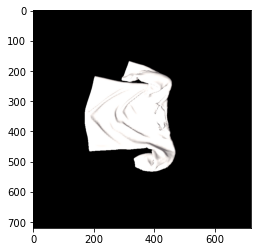

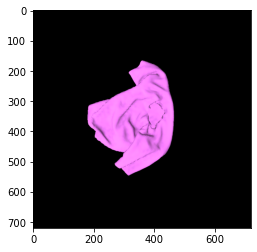

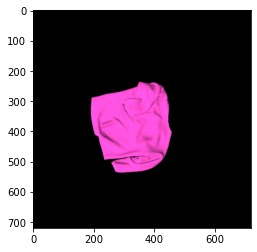

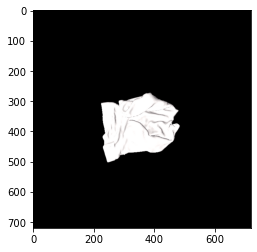

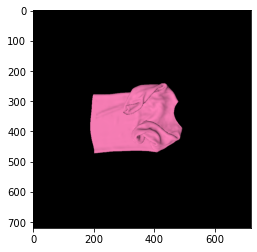

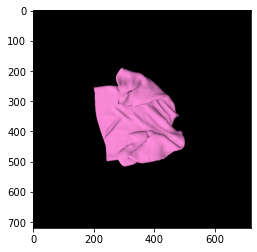

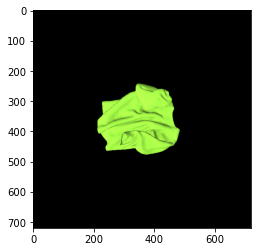

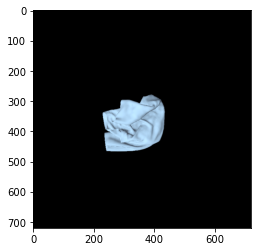

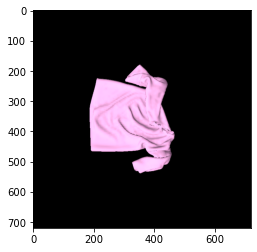

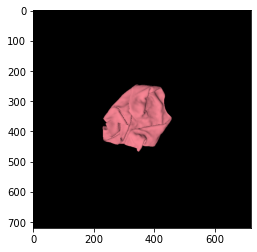

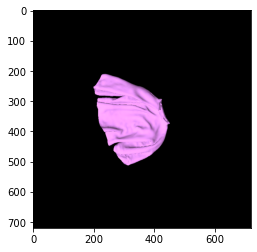

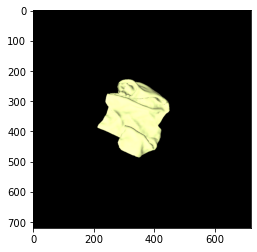

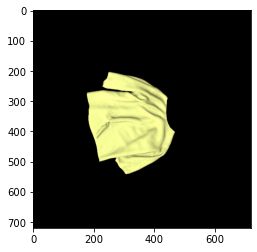

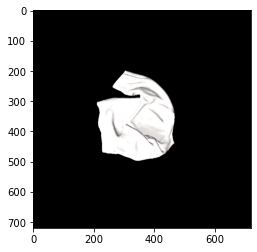

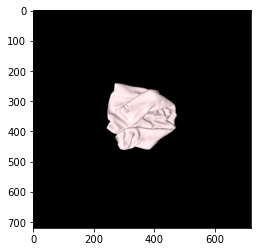

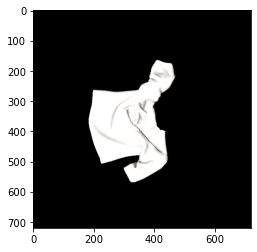

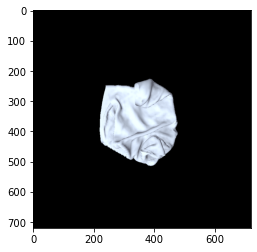

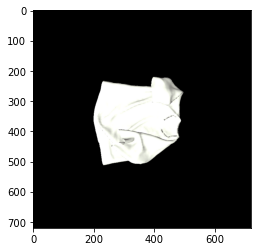

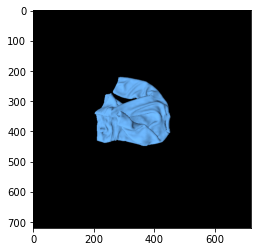

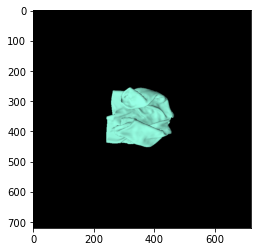

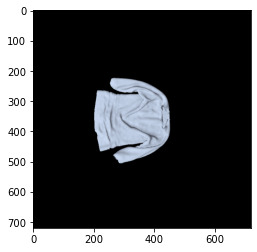

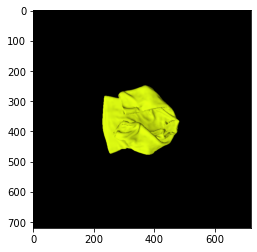

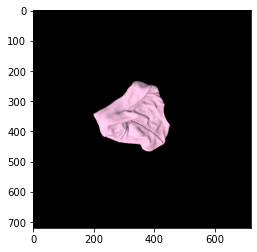

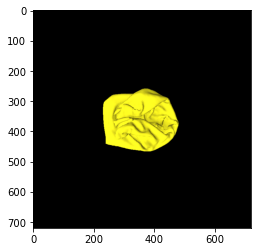

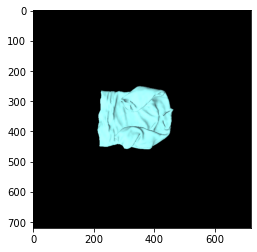

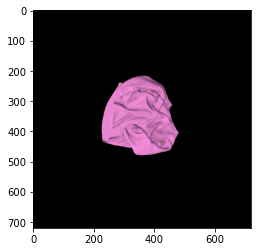

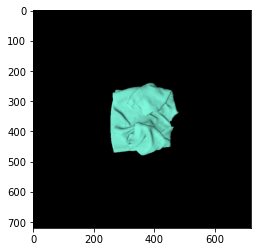

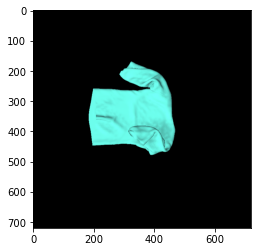

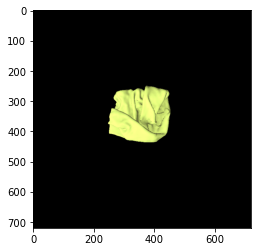

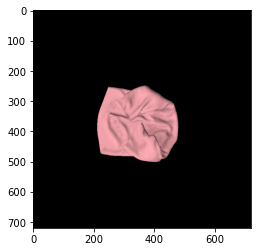

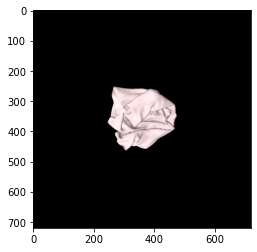

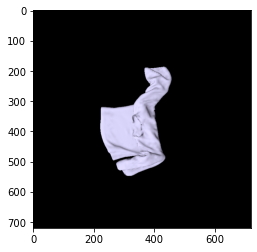

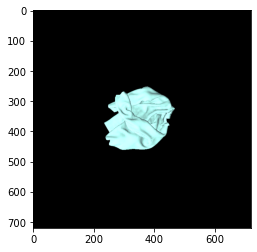

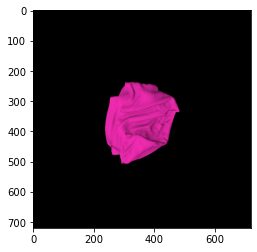

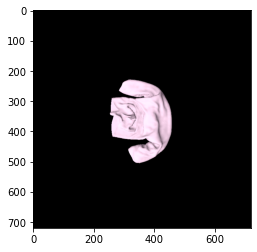

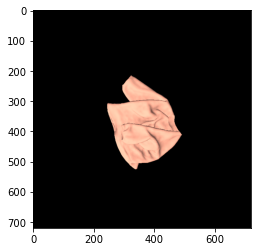

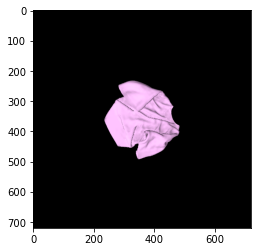

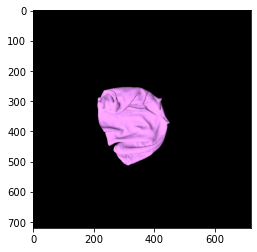

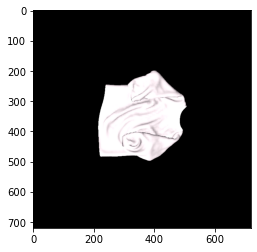

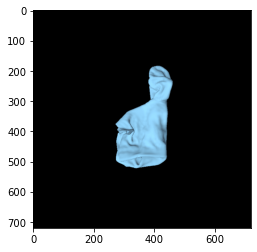

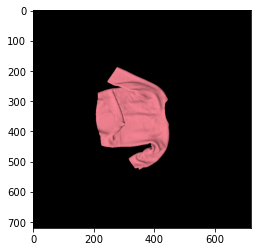

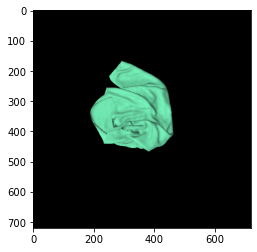

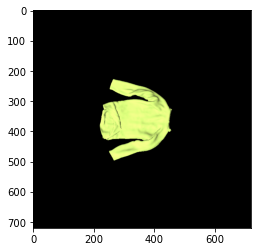

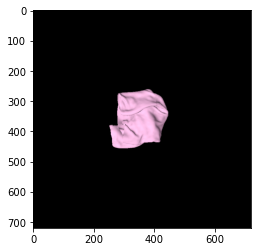

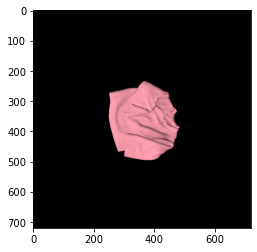

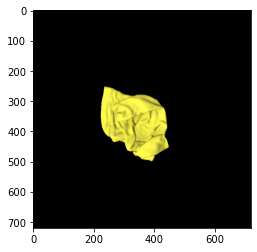

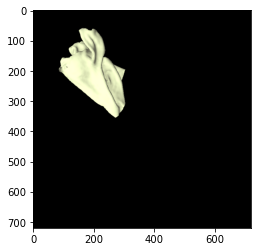

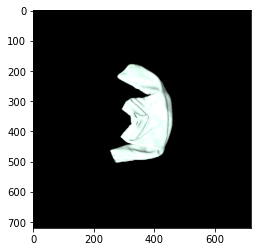

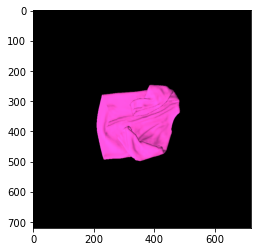

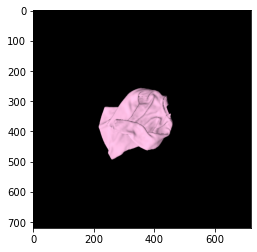

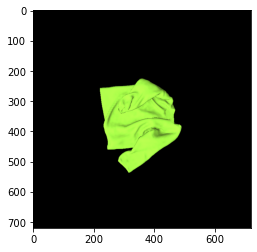

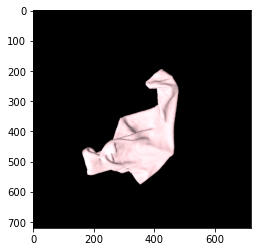

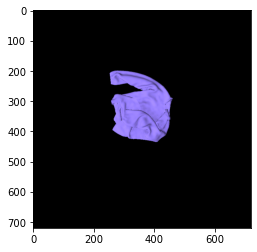

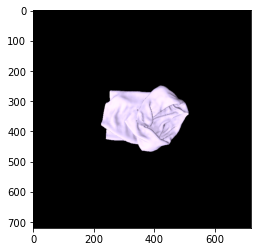

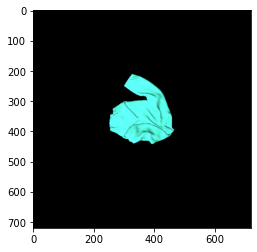

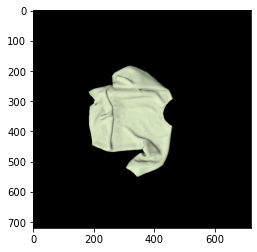

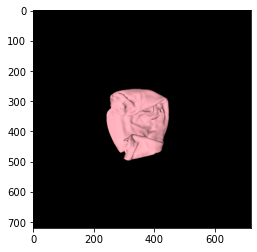

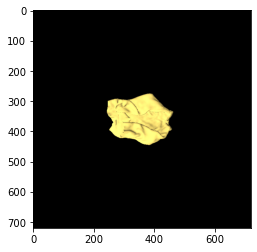

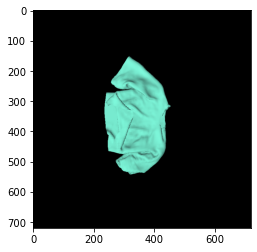

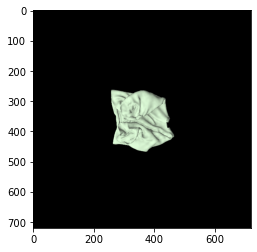

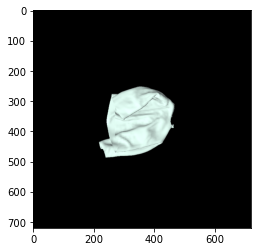

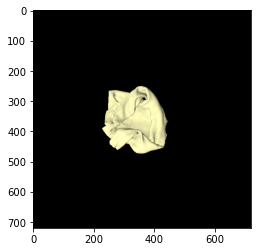

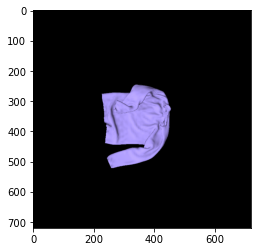

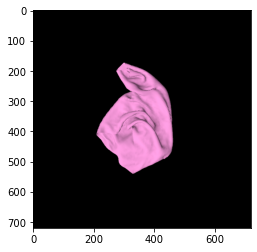

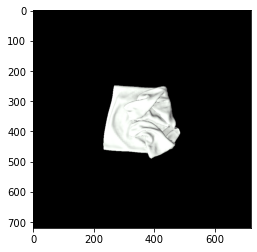

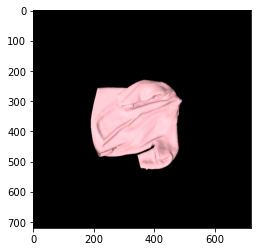

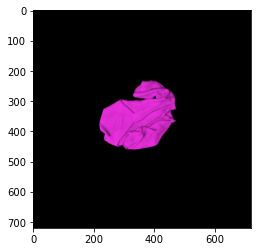

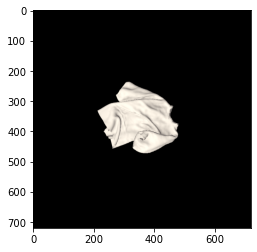

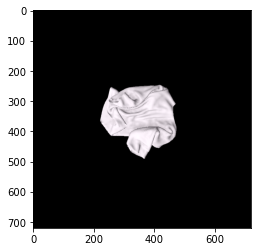

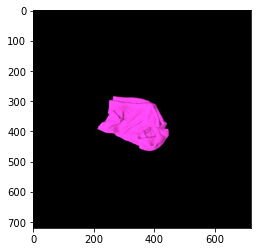

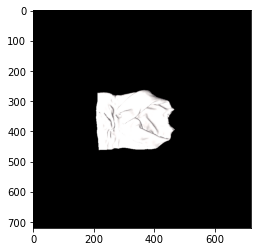

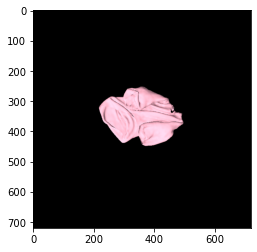

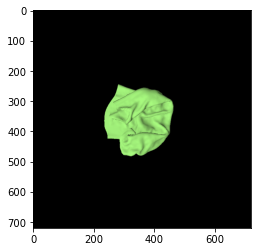

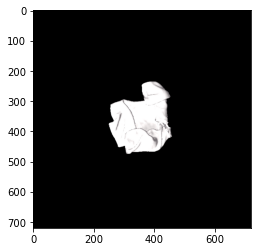

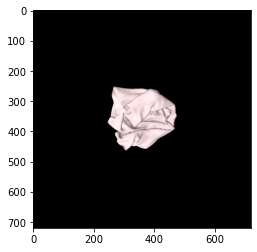

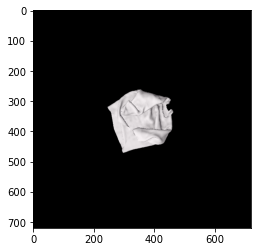

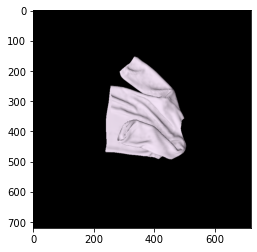

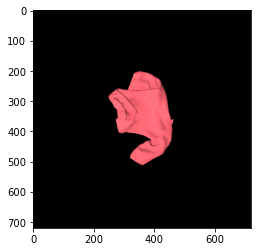

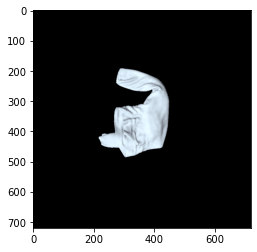

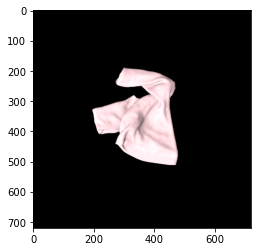

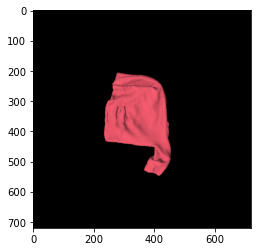

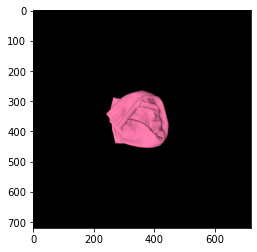

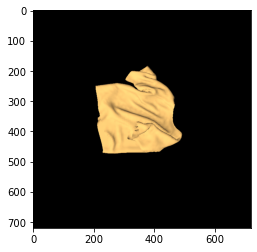

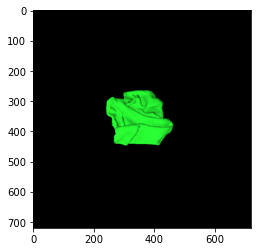

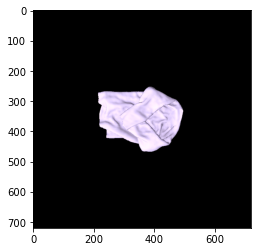

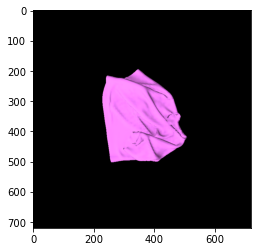

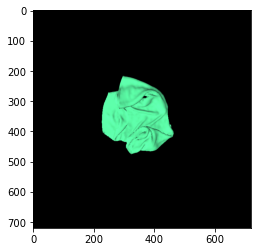

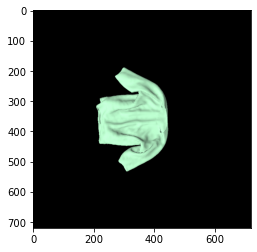

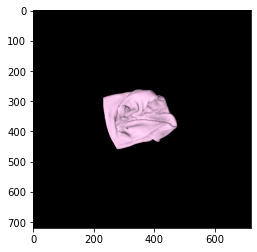

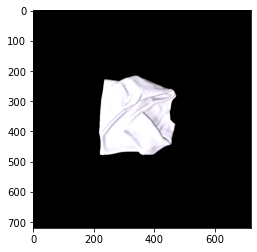

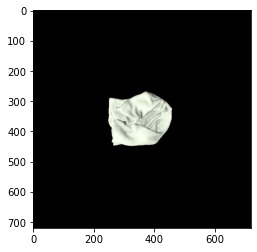

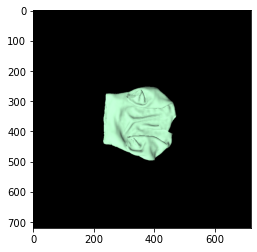

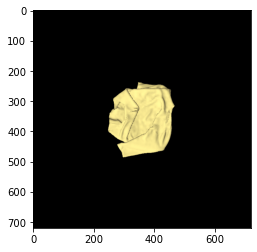

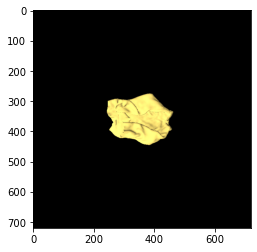

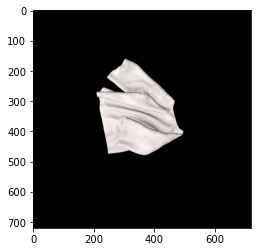

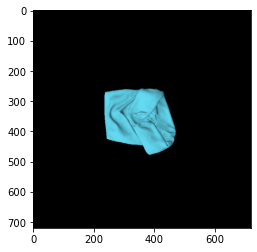

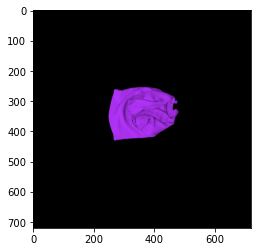

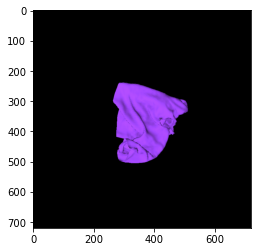

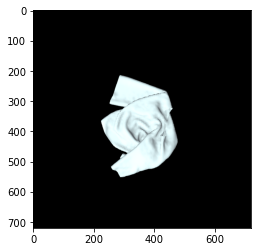

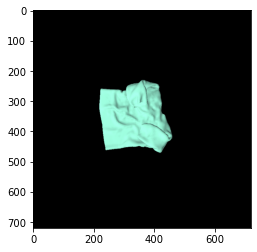

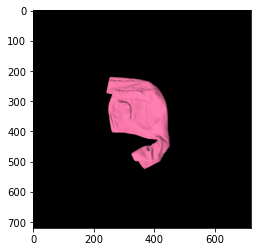

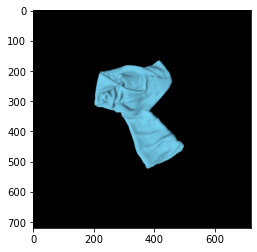

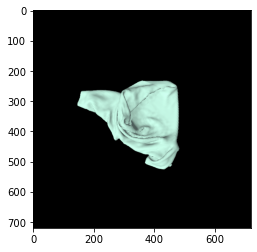

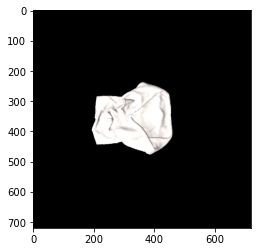

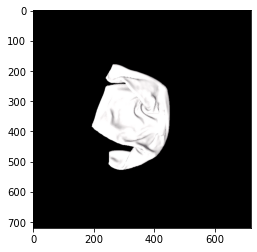

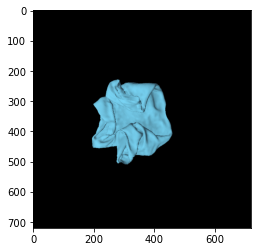

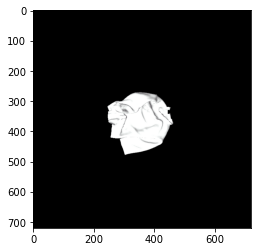

In [6]:
dataset_path = '/local/crv/acanberk/folding-unfolding/src/final_experiments/all_distribution/latest_ckpt_eval_2/replay_buffer.hdf5'



distances = {"0":[], "1":[]}
with h5py.File(dataset_path, "r") as dataset:
    while True:
        k = np.random.choice(list(dataset.keys()))
        # for i, k in zip(range(100000), dataset):
        #     # if 'last' in k:
        group = dataset[k]
        obs = group['observations'][:3].transpose(1, 2, 0)
        next_obs = group['next_observations'][:3].transpose(1, 2, 0)
        distance_tuple = (group.attrs['postaction_weighted_distance'], group.attrs['postaction_l2_distance'], group.attrs['postaction_icp_distance'], group.attrs['postaction_pointwise_distance'], next_obs)
        # print(obs.shape)
        plt.imshow(next_obs)
        plt.show()
        answer = input("State: (1, 0, x, d):")
        plt.close()

        if answer == "x":
            exit(1)
        if answer == "d":
            break
        
        if answer in ['1', '0']:
            distances[str(answer)].append(distance_tuple)

response = input("Dump? y/n")
if response == "y":
    if not os.path.isdir('thresholds/'):
        os.mkdir('thresholds')
    file = open('thresholds/' + dataset_path.split('/')[0] + "_" + datetime.datetime.now().strftime("%H%M%S%d") + ".pkl", "wb")
    pkl.dump(distances, file)


In [7]:

print(distances)

{'0': [(0.10247151425689505, 0.09597939174215606, 0.11452831321283888, 0.14635308109499937, array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32

In [8]:
weighted_arr = [[], []]
deformable_arr = [[], []]
rigid_arr = [[], []]
pointwise_arr = [[], []]

for i in range(2):
    for weighted, deformable, rigid, pointwise, image in distances[str(i)]:
        weighted_arr[i].append(weighted)
        deformable_arr[i].append(deformable)
        rigid_arr[i].append(rigid)
        pointwise_arr[i].append(pointwise)

fail counter goal: 153 success counter goal 62
100 59


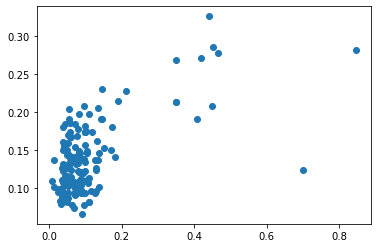

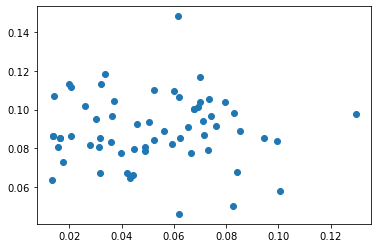

1.7857142857142856


False

In [13]:
stats = {'weighted':weighted_arr, 'deformable':deformable_arr, 'rigid':rigid_arr, 'pointwise':pointwise_arr}

# for k, v in stats.items():
#     plt.hist(np.array(v[0]))
#     plt.hist(np.array(v[1]))
#     plt.title(k)
#     plt.show()x
#     plt.close()

def condition(s, i):
    return (deformable_arr[s][i] < 0.12) and (rigid_arr[s][i] < 0.1)

def success_condition(deformable_distance, rigid_distance, coeffs=(1/0.18, 1/0.21)):
    print(coeffs[0] * deformable_distance + coeffs[1] * rigid_distance)
    return (coeffs[0] * deformable_distance + coeffs[1] * rigid_distance) < 1

print("fail counter goal:", len(weighted_arr[0]), "success counter goal", len(weighted_arr[1]))
fail_counter = 0
success_counter = 0
for i in range(len(weighted_arr[0])):
    if not condition(0, i):
        fail_counter += 1
for i in range(len(weighted_arr[1])):
    if condition(1, i):
        success_counter += 1

print(fail_counter, success_counter)

plt.close()
for i in range(2):
    plt.scatter(np.array(rigid_arr[i]), np.array(deformable_arr[i]))
    plt.show()
# plt.plot(np.array(weighted[1]))

success_condition(0.15, 0.2)